<center> <h1>House price prediction</h1> </center>

The data comes from this page: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Load data

In [2]:
data = pd.read_csv('kc_house_data.csv')

### Data exploration

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

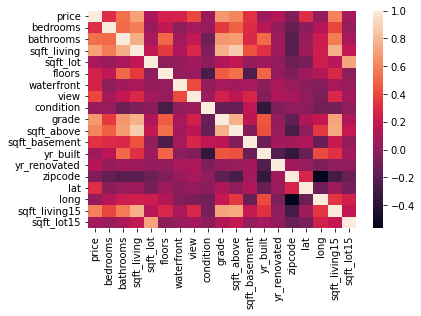

In [6]:
data_to_heatmap = data.drop(['id'], axis=1)
sns.heatmap(data_to_heatmap.corr())

### Remove outliers

In [7]:
def remove_outliers(data, colname):
    q90 = np.percentile(data[colname], 90)
    q10 = np.percentile(data[colname], 10)
    iqr = q90-q10
    min = q10-(1.25*iqr)
    max = q90+(1.25*iqr)
    data = data[(data[colname] > min) & (data[colname] < max)]
    return data

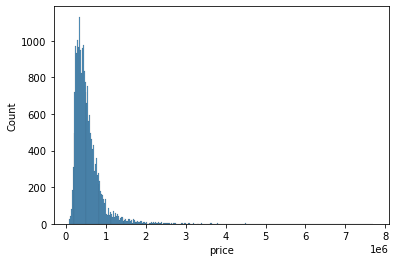

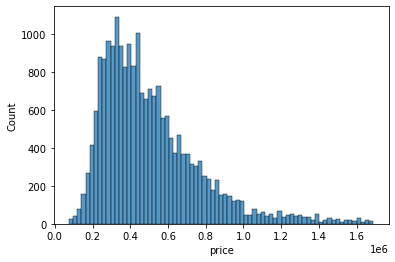

In [8]:
#price
sns.histplot(data['price'])
plt.show()
data = remove_outliers(data, 'price')
sns.histplot(data['price'])
plt.show()

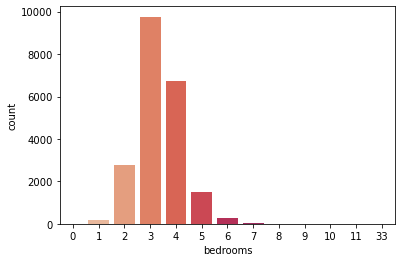

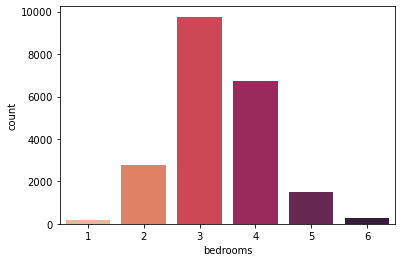

In [9]:
#bedrooms
sns.countplot(x=data['bedrooms'], palette="rocket_r")
plt.show()
data = data[(data["bedrooms"] < 7) & (data["bedrooms"] > 0)]
sns.countplot(x=data['bedrooms'], palette="rocket_r")
plt.show()

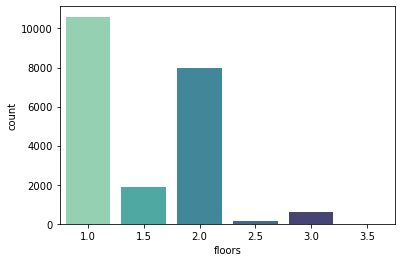

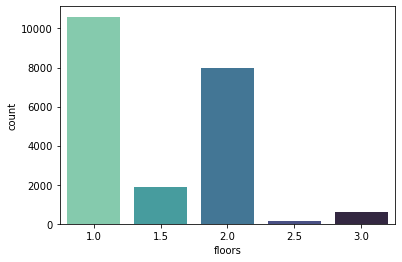

In [10]:
#floors
sns.countplot(x=data['floors'], palette="mako_r")
plt.show()
data = data[(data["floors"] <= 3 )]
sns.countplot(x=data['floors'], palette="mako_r")
plt.show()

### Split the data into train sets and test sets

In [11]:
FEATURES = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'yr_built',
    'zipcode',
    'lat',
    'long',
]
data = data[FEATURES + ['price']]

In [12]:
X = pd.DataFrame(data[FEATURES])
y = pd.DataFrame(data['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Number of test samples :", X_test.shape[0])
print("Number of training samples:",X_train.shape[0])

Number of test samples : 4235
Number of training samples: 16937


### Train models and calculate model score

In [13]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor model score:', round(RF.score(X_test,  y_test),2))

DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
print('Decision Tree Regressor model score:', round(DTR.score(X_test, y_test),2))

LR = LinearRegression()
LR.fit(X_train, y_train)
print('Linear Regression model score:', round(LR.score(X_test, y_test),2))

Random Forest Regressor model score: 0.86
Decision Tree Regressor model score: 0.73
Linear Regression model score: 0.71


### Predict values

Comparison of algorithm prediction results with expected values. The table shows 10 example values.

In [14]:
y_predicted_RF = RF.predict(X_test)
y_predicted_DTR = DTR.predict(X_test)
y_predicted_LR = LR.predict(X_test)

data_to_dataframe = list(zip(y_test['price'][:10], y_predicted_RF[:10], y_predicted_DTR[:10], list(itertools.chain(*y_predicted_LR[:10]))))
df=pd.DataFrame(data_to_dataframe, columns=['Expected', 'Random Forest Regressor', 'Decision Tree Regressor', 'Linear Regression'])
df.round(2)

,Expected,Random Forest Regressor,Decision Tree Regressor,Linear Regression
0,500000.0,643707.55,535000.0,885572.87
1,475000.0,366649.24,350000.0,568334.51
2,1520000.0,1296018.19,1000000.0,875194.20
3,729999.0,1125373.50,1000000.0,747362.81
4,355200.0,331638.18,329000.0,306613.90
5,251000.0,233610.31,219000.0,142598.11
6,1000000.0,892250.50,1272500.0,685004.92
7,375000.0,417873.68,350000.0,460146.62
8,1008000.0,869068.76,811000.0,812286.84
9,230000.0,304101.64,201000.0,244255.95
